In [1]:
import torch as tch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define a nonlinear function with noise
def f(x):
  return np.cos(x)*np.exp(-x) + np.random.normal(0, 2.5, len(x))

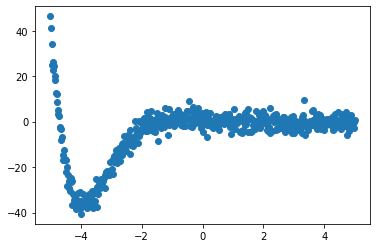

In [3]:
# Visualize 
x = np.linspace(-5, 5, 501)
y = f(x)
plt.scatter(x,y);

In [4]:
# Define a deep neural net.
# This will be a relatively large model, so we can
# learn the nonlinearities very well and maximize 
# prediction accuracy
model = nn.Sequential(
    nn.Linear(1, 256),
    nn.SELU(),
    nn.Linear(256, 256),
    nn.SELU(),
    nn.Linear(256, 1)
)

In [5]:
# Put np.arrays into tch.tensors
X = tch.tensor(x.reshape(-1,1)).float()
Y = tch.tensor(y.reshape(-1,1)).float()

# Split into train and test sets (70/30)
ntrain = int(0.7*len(X))
idx = tch.tensor(np.random.choice(np.arange(len(X)), ntrain, replace=False))
xtrain = X[idx]
xtest = X[~idx]
ytrain = Y[idx]
ytest = Y[~idx]

In [6]:
# Define optimizer and loss function
optimizer = optim.Adam(model.parameters())
loss_fn = nn.L1Loss()

In [7]:
# Train the model
it = 0
loss_val = 10
while (loss_val > 1e-4) and (it < 5000):
  y_pred = model(xtrain)
  loss = loss_fn(y_pred, ytrain)
  loss_val = loss.item()

  if it % 500 == 0:
    print("Epoch: {}, Loss: {}".format(it, loss_val))

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  it += 1
print("Loss after all iterations: ", loss_val)

Epoch: 0, Loss: 7.5792131423950195
Epoch: 500, Loss: 2.859755039215088
Epoch: 1000, Loss: 2.068410634994507
Epoch: 1500, Loss: 2.028832197189331
Epoch: 2000, Loss: 2.0136618614196777
Epoch: 2500, Loss: 1.9992698431015015
Epoch: 3000, Loss: 1.9767626523971558
Epoch: 3500, Loss: 2.000166893005371
Epoch: 4000, Loss: 1.9857655763626099
Epoch: 4500, Loss: 1.9662964344024658
Loss after all iterations:  1.958327054977417


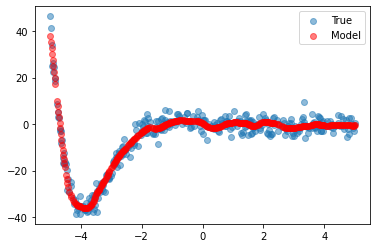

In [8]:
# Visually inspect model fit on test set
yp = model(xtest)
plt.scatter(xtest,ytest, alpha=0.5, label='True')
plt.scatter(xtest, yp.detach().numpy(), alpha=0.5, c='r', label='Model')
plt.legend();

In [12]:
# Quantify test set error
print("Test set loss: ", loss_fn(yp, ytest).item())

Test set loss:  2.031618595123291
